# THE SPARKS FOUNDATION : GRADUATE ROTATIONAL INTERNSHIP PROGRAM (GRIP), SEPTEMBER 2023

# INTERNSHIP TASK 2 : Prediction Using Decision Tree Algorithm

## PROBLEM STATEMENT

Data Source : https://bit.ly/3kXTdox

Create a Decision Tree Classifier and Visualize it Graphically

The purpose is if we feed any new data to this classifier it will be able to predict the right class accordingly.

## SOLUTION

## AUTHOR : ARITRA BAG

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import gradio as gr

### IMPORTING DATASET

In [2]:
#Reading dataset from a .CSV file directly
dataset=pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### DROPPING REDUNDANT FEATURES

We remove the 'Id' column as it is not important while creating the classifier

In [3]:
dataset = dataset.drop(['Id'],axis = 1)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### EXPLORATORY DATA ANALYSIS

In [4]:
print('\nThe number of null values in the dataset is : \n' + str(dataset.isnull().sum()))
print('\nThe number of duplicate values in the dataset is : ' + str(dataset.duplicated().sum()))
print('\nThe datatypes in the dataset include :\n')
print(dataset.info())
print('\nThe data distribution in the columns is given by :\n')
print(dataset.describe())
print('\nThe number of unique values in the Sepal Length cm column is : ' + str(len(dataset['SepalLengthCm'].unique())))
print('\nThe number of unique values in the Sepal Width cm column is : ' + str(len(dataset['SepalWidthCm'].unique())))
print('\nThe number of unique values in the Petal Length cm column is : ' + str(len(dataset['PetalLengthCm'].unique())))
print('\nThe number of unique values in the Petal Width cm column is : ' + str(len(dataset['PetalWidthCm'].unique())))
print('\nThe correlation coefficient between the features is :\n \n' + str(dataset.iloc[:,:-1].corr()) + '\n\n')


The number of null values in the dataset is : 
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

The number of duplicate values in the dataset is : 3

The datatypes in the dataset include :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

The data distribution in the columns is given by :

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594 

### GRAPHICAL REPRESENTATION OF THE DATASET

This gives us a visual representation of the dataset

Text(0.5, 1.0, 'Boxplot for Petal Width')

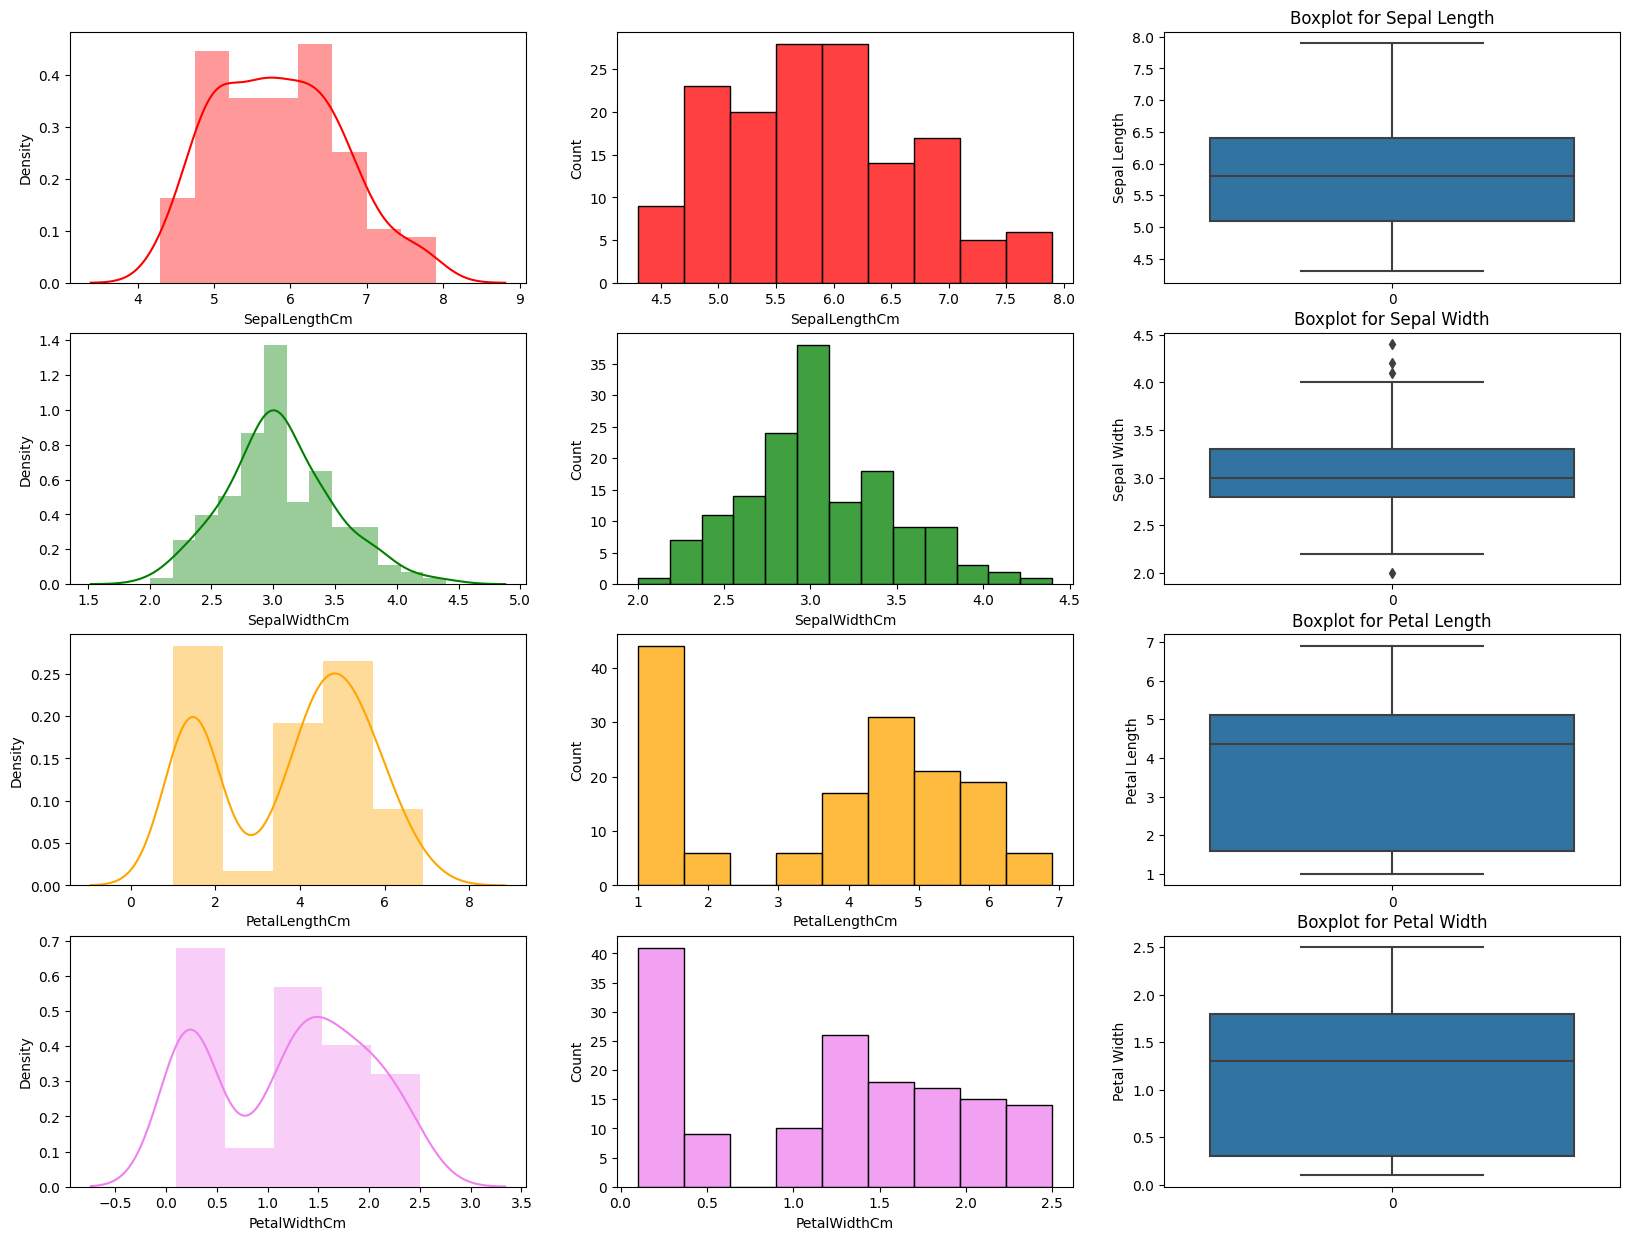

In [8]:
#Data Distribution
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (20,15))
plt.tight_layout(pad = 3.0)
plt.subplot(4,3,1)
sns.distplot(dataset['SepalLengthCm'],color = 'red')
plt.subplot(4,3,2)
sns.histplot(dataset['SepalLengthCm'],color = 'red')
plt.subplot(4,3,3)
sns.boxplot(dataset['SepalLengthCm'])
plt.ylabel('Sepal Length')
plt.title('Boxplot for Sepal Length')
plt.subplot(4,3,4)
sns.distplot(dataset['SepalWidthCm'],color = 'green')
plt.subplot(4,3,5)
sns.histplot(dataset['SepalWidthCm'],color = 'green')
plt.subplot(4,3,6)
sns.boxplot(dataset['SepalWidthCm'])
plt.ylabel('Sepal Width')
plt.title('Boxplot for Sepal Width')

plt.subplot(4,3,7)
sns.distplot(dataset['PetalLengthCm'],color = 'orange')
plt.subplot(4,3,8)
sns.histplot(dataset['PetalLengthCm'],color = 'orange')
plt.subplot(4,3,9)
sns.boxplot(dataset['PetalLengthCm'])
plt.ylabel('Petal Length')
plt.title('Boxplot for Petal Length')
plt.subplot(4,3,10)
sns.distplot(dataset['PetalWidthCm'],color = 'violet')
plt.subplot(4,3,11)
sns.histplot(dataset['PetalWidthCm'],color = 'violet')
plt.subplot(4,3,12)
sns.boxplot(dataset['PetalWidthCm'])
plt.ylabel('Petal Width')
plt.title('Boxplot for Petal Width')

<Axes: >

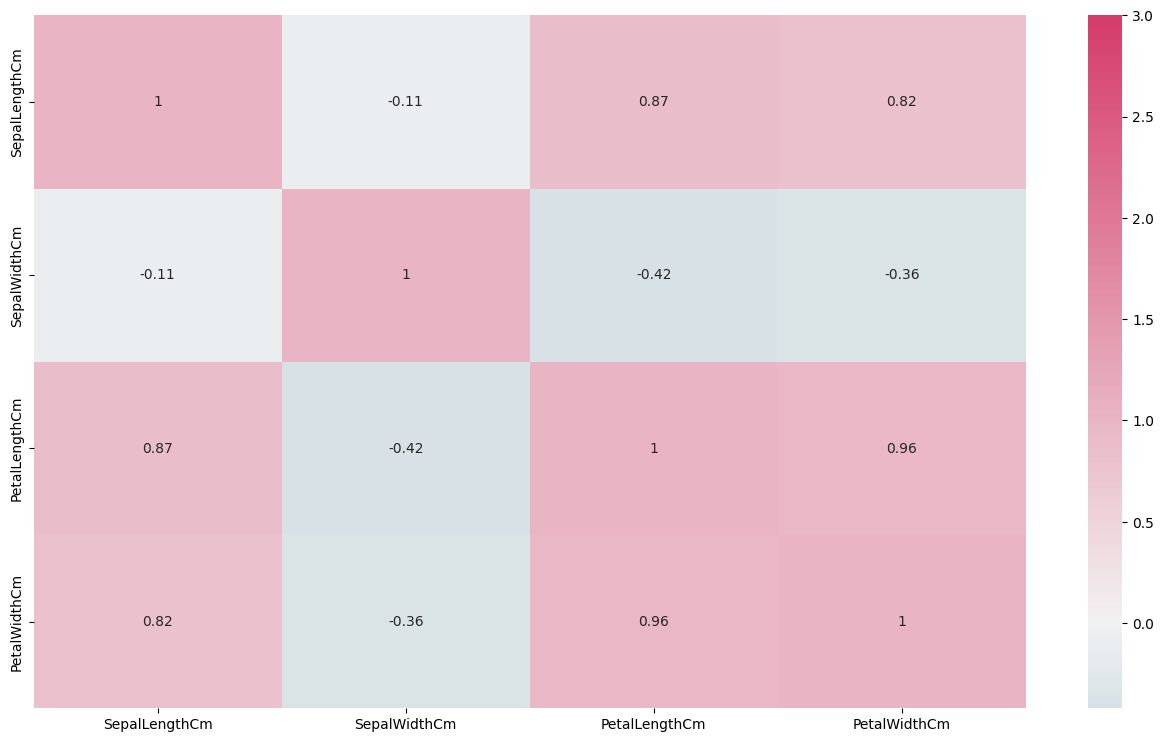

In [8]:
from numpy.lib.twodim_base import triu_indices_from
plt.figure(figsize = (16,9))
cmap = sns.diverging_palette(220,0, as_cmap = True)
sns.heatmap(dataset.iloc[:,:-1].corr(),cmap = cmap, center = 0, vmax = 3,annot = True)         

<Figure size 2000x1500 with 0 Axes>

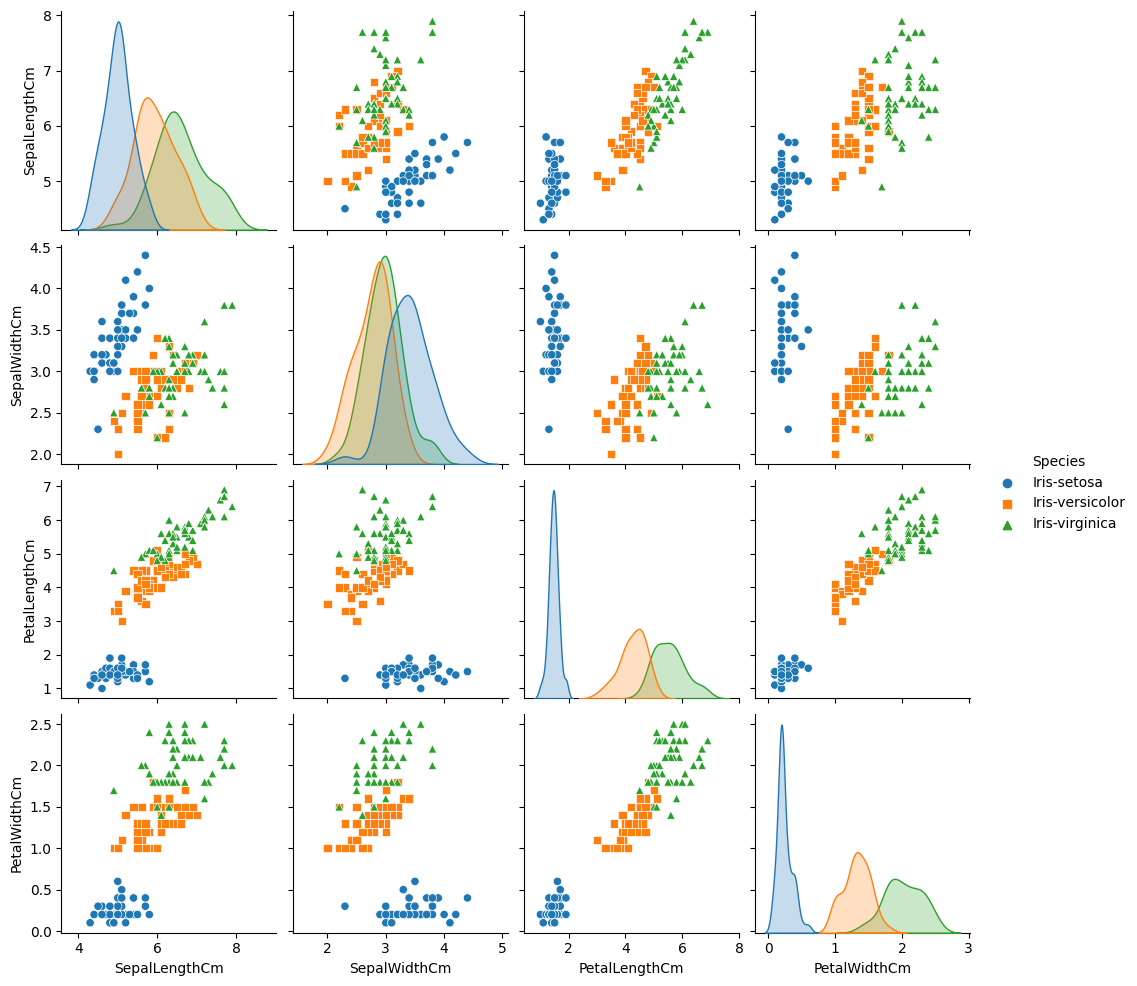

In [8]:
plt.figure(figsize = (20,15))
plt.tight_layout(pad = 3.0)
sns.pairplot(dataset, hue = 'Species', markers = ["o", "s", "^"])

### SPLITTING INTO THE X(FEATURES) AND Y(TARGET)

We divide the data into "attributes" (inputs or features or X values) and "labels" (outputs or target or Y values).

In [5]:
features = dataset.iloc[:,:-1].values
targets = dataset.iloc[:,-1].values

In [34]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [35]:
targets

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

### ENCODING THE TARGET VALUES

In [9]:
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_targets = encoder.fit_transform (targets.reshape(-1, 1))
print(encoded_targets)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### SPLITTING THE DATASET INTO THE TRAINING AND TEST SET

Here 20% of the total dataset will be used for testing purposes

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (features, encoded_targets, test_size = 0.2, shuffle = True)

### GETTING THE BEST PARAMETERS FOR THE DECISION TREE CLASSIFIER USING GRIDSEARCH CROSS VALIDATION

In [12]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV, cross_val_score

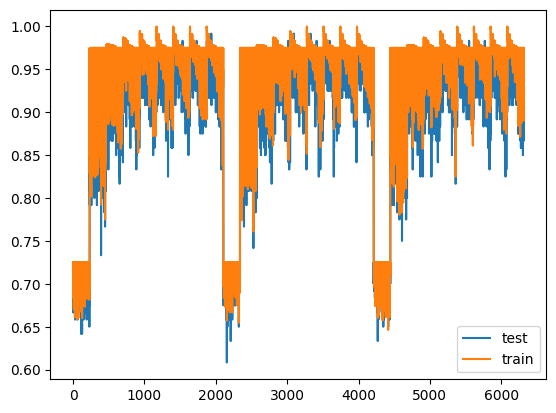

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 8, 'splitter': 'random'}
0.9916666666666666


In [45]:
#creating a dictionary of all values we want to test
param_grid = {'criterion' : ['gini', 'entropy', 'log_loss'], 'splitter' : ['best', 'random'], 'max_depth' : np.arange(1,10), 'min_samples_split' : np.arange(2,15), 'min_samples_leaf' : np.arange(1,10) }

# decision tree model
tree_model = DecisionTreeClassifier()

#using gridsearch to test all values
tree_gscv = GridSearchCV(tree_model, param_grid, cv = 10, return_train_score=True, scoring='f1_micro')

#fitting the model to the data
tree_gscv.fit (x_train, y_train)

#Plotting the results
test_scores = tree_gscv.cv_results_['mean_test_score']
train_scores = tree_gscv.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

#getting the best parameters
print(tree_gscv.best_params_)

#getting the best score
print(tree_gscv.best_score_)

### CREATING THE DECISION TREE CLASSIFIER AND PREDICTING THE RESULTS

In [13]:
classifier = DecisionTreeClassifier (criterion = 'gini', max_depth = 9, min_samples_leaf = 3, min_samples_split = 8, splitter = 'random')
classifier.fit (x_train, y_train)
y_predicted = classifier.predict (x_test)
y_predicted_proba = classifier.predict_proba(x_test)

In [14]:
y_test

array([0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 2,
       0, 1, 1, 1, 0, 0, 0, 1])

In [15]:
y_predicted

array([0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 2,
       0, 1, 1, 1, 0, 0, 0, 1])

### PLOTTING THE DECISION TREE CLASSIFIER

[Text(0.5, 0.9166666666666666, 'node #0\nPetalWidthCm <= 1.49\ngini = 0.666\nsamples = 100.0%\nvalue = [0.317, 0.342, 0.342]\nclass = Iris-versicolor'),
 Text(0.25, 0.75, 'node #1\nPetalWidthCm <= 1.054\ngini = 0.506\nsamples = 56.7%\nvalue = [0.559, 0.426, 0.015]\nclass = Iris-setosa'),
 Text(0.125, 0.5833333333333334, 'node #2\nPetalLengthCm <= 2.409\ngini = 0.236\nsamples = 36.7%\nvalue = [0.864, 0.136, 0.0]\nclass = Iris-setosa'),
 Text(0.0625, 0.4166666666666667, 'node #3\ngini = 0.0\nsamples = 31.7%\nvalue = [1.0, 0.0, 0.0]\nclass = Iris-setosa'),
 Text(0.1875, 0.4166666666666667, 'node #4\ngini = 0.0\nsamples = 5.0%\nvalue = [0.0, 1.0, 0.0]\nclass = Iris-versicolor'),
 Text(0.375, 0.5833333333333334, 'node #5\nSepalWidthCm <= 2.669\ngini = 0.08\nsamples = 20.0%\nvalue = [0.0, 0.958, 0.042]\nclass = Iris-versicolor'),
 Text(0.3125, 0.4166666666666667, 'node #6\nPetalLengthCm <= 4.319\ngini = 0.198\nsamples = 7.5%\nvalue = [0.0, 0.889, 0.111]\nclass = Iris-versicolor'),
 Text(0.25

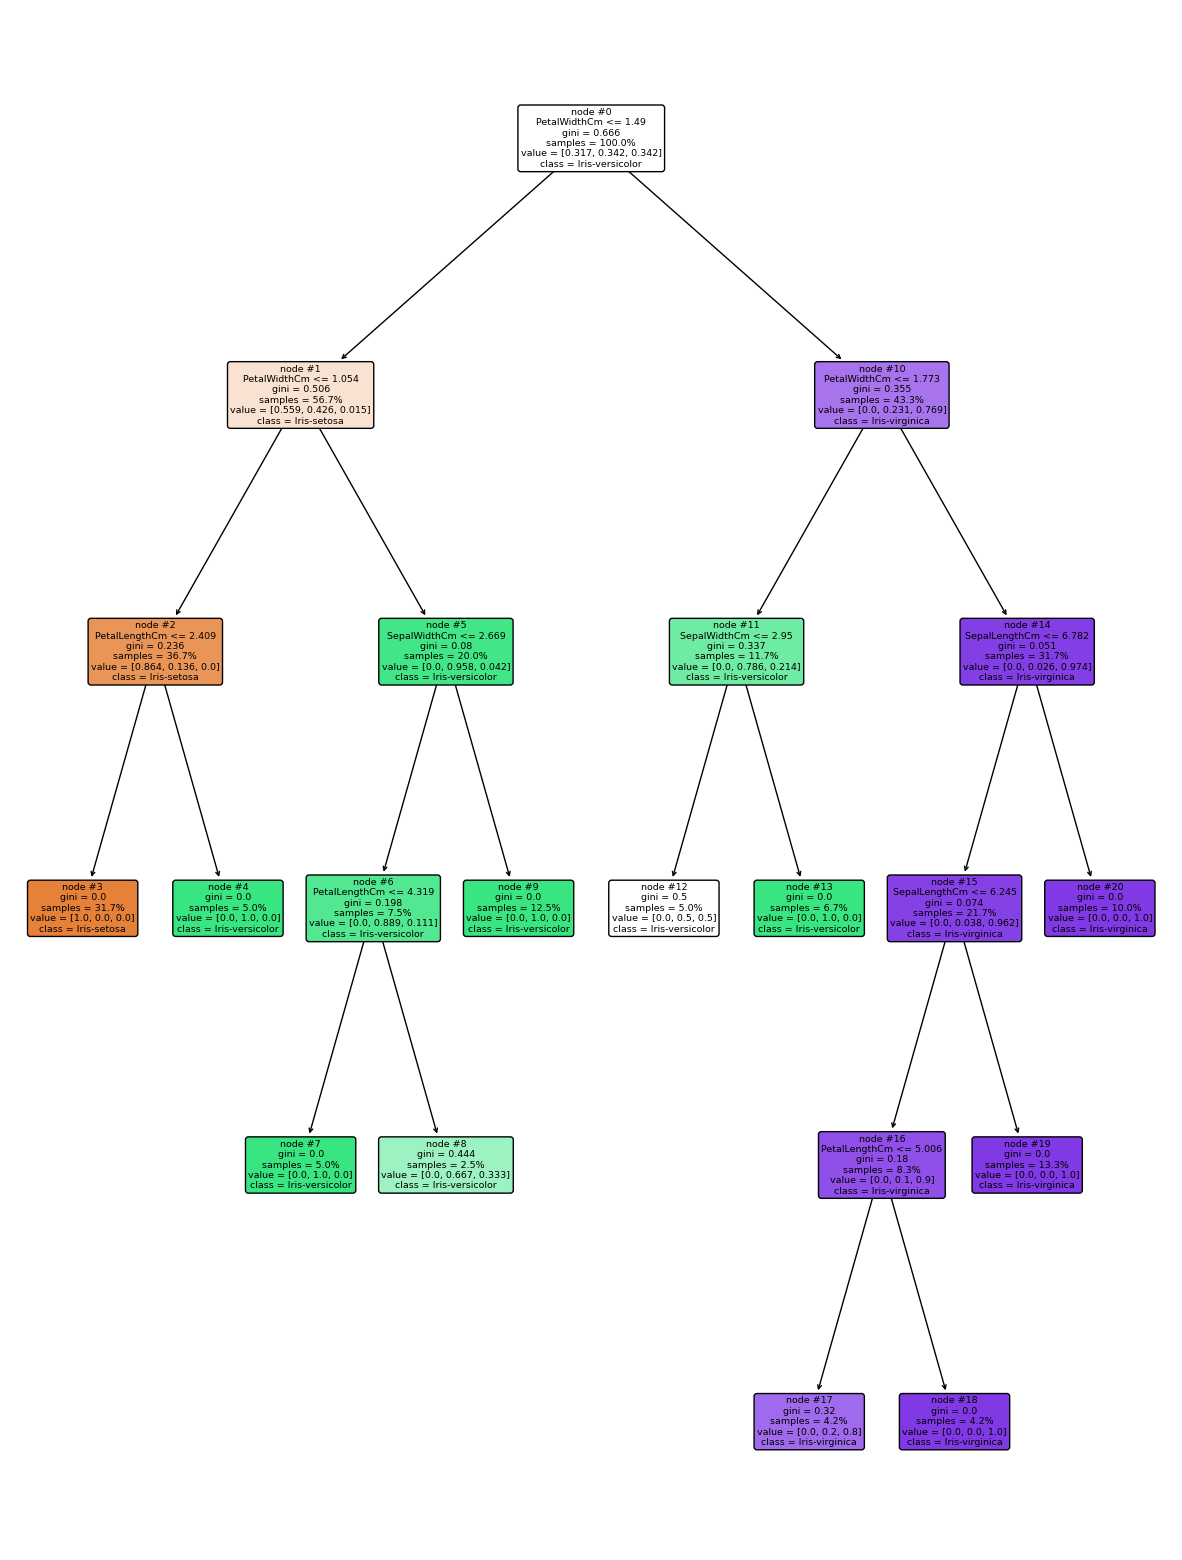

In [16]:
plt.figure(figsize = (15,20))
sklearn.tree.plot_tree(classifier, feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], label='all', filled=True, impurity=True, node_ids=True, proportion=True, rounded=True, precision=3)

### EVALUATION OF THE CLASSIFIER

The final step is to mathematically evaluate the performance of algorithm.

In [17]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, multilabel_confusion_matrix

In [18]:
print('The classification test results are : \n')
print(classification_report(y_test,y_predicted))
print('Confusion Matrix :')
cm=multilabel_confusion_matrix(y_test,y_predicted)
print(cm)
print('\n')
print('The test accuracy percentage is :')
print((accuracy_score(y_test,y_predicted))*100)
print('\n')
print('The test precision percentage is :')
print((precision_score(y_test,y_predicted,average='micro'))*100)
print('\n')
print('The test recall percentage is :')
print((recall_score(y_test,y_predicted,average='micro'))*100)
print('\n')
print('The test f1 percentage is :')
print((f1_score(y_test,y_predicted,average='micro'))*100)
print('\n')
print('The test ROC AUC score is :')
print(roc_auc_score(y_test,y_predicted_proba, multi_class = 'ovr'))

The classification test results are : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix :
[[[18  0]
  [ 0 12]]

 [[20  1]
  [ 0  9]]

 [[21  0]
  [ 1  8]]]


The test accuracy percentage is :
96.66666666666667


The test precision percentage is :
96.66666666666667


The test recall percentage is :
96.66666666666667


The test f1 percentage is :
96.66666666666667


The test ROC AUC score is :
0.9700176366843034


### SAVING THE MODEL

In [19]:
import pickle
pickle.dump(classifier, open('/home/aritrabag/Documents/internship_projects/TSF/decision_trees/classifer','wb'))

### CREATING A GRADIO BASED UI FOR THE CLASSIFIER

In [ ]:
def iris_predictor(sl,sw,pl,pw):
    species = ['Setosa', 'Versicolor', 'Virginica']
    input_array = np.array([[sl,sw,pl,pw]])
    i = classifier.predict(input_array)
    a = i[0]
    return species[a]

with gr.Blocks() as Iris_Species_Predictor:
    sl = gr.inputs.Slider(minimum = 0, maximum = 8, step = 0.1, default = 2, label = "Sepal Length")
    sw = gr.inputs.Slider(minimum = 0, maximum = 5, step = 0.1, default = 2, label = "Sepal Width")
    pl = gr.inputs.Slider(minimum = 0, maximum = 8, step = 0.1, default = 2, label = "Petal Length")
    pw = gr.inputs.Slider(minimum = 0, maximum = 3, step = 0.1, default = 2, label = "Petal Width")
    output = gr.Textbox(label =" Possible Species of Iris ")
    calculate_btn = gr.Button("Detect Species")
    calculate_btn.click(fn = iris_predictor, inputs = [sl,sw,pl,pw], outputs=output, api_name="iris_species_predictor")
    
Iris_Species_Predictor.launch(debug = True)   

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
